In [1]:
import logging
import importlib
from boosted_lorenzetti.utils import set_logger
set_logger('INFO')
   # Must be imported so importlib works with these jobs
from boosted_lorenzetti.deeponet.jobs import KFoldMLPUnstackedDeepONetJob
from boosted_lorenzetti.mlp.jobs import KFoldTrainingJob
from pathlib import Path
import seaborn as sns
import mplhep
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import pandas as pd
plt.style.use(mplhep.style.ATLAS)
mpl.rc('text', usetex = True)

import mlflow
base_dir = Path.home().absolute() / 'data' / 'mestrado' / 'topicos_ml'
tracking_uri = str(base_dir / 'mlruns')
tracking_uri = f'file://{tracking_uri}'
logging.info(f'Setting MLflow tracking URI to {tracking_uri}')
mlflow.set_tracking_uri(tracking_uri)
mlflow.set_experiment('icassp-mlp')

/home/lucasbanunes/miniconda3/envs/blzt/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2025-09-16 01:07:44 | INFO | root | 3662727065 | 23 | Setting MLflow tracking URI to file:///home/lucasbanunes/data/mestrado/topicos_ml/mlruns


<Experiment: artifact_location='file:///home/lucasbanunes/data/mestrado/topicos_ml/mlruns/714083779440500432', creation_time=1757783001833, experiment_id='714083779440500432', last_update_time=1757783001833, lifecycle_stage='active', name='icassp-mlp', tags={}>

In [2]:
def load_job(run_id: str):
    client = mlflow.MlflowClient()
    run = client.get_run(run_id)
    splitted_full_name = run.data.params['class_name'].split('.')
    module_name, full_class_name = splitted_full_name[0], splitted_full_name[1:]
    module = importlib.import_module(module_name)
    for attr in full_class_name:
        module = getattr(module, attr)
    return module.from_mlflow_run_id(run_id)

In [3]:
kfold_id = '2d4efb386fb64f5da0bbdcaec3ffbf73'
output_dir = base_dir / 'deeponet_mlp'
output_dir.mkdir(parents=True, exist_ok=True)
kfold_job = load_job(kfold_id)

In [4]:
max_sp = kfold_job.metrics['val.max_sp'].max()
logging.info(f'Maximum SP over all folds: {max_sp:.4f}')
kfold_job.metrics

2025-09-16 01:08:04 | INFO | root | 3650911469 | 2 | Maximum SP over all folds: 0.9813


,train.max_sp_acc,train.max_sp_fn,train.max_sp_thresh,train.max_sp_fp,train.max_sp_fpr,train.roc_auc,train.max_sp_tn,train.max_sp_tp,train.loss,train.max_sp_tpr,...,predict.max_sp_fpr,predict.max_sp_thresh,predict.roc_auc,predict.max_sp_tn,predict.max_sp_fn,predict.max_sp,predict.max_sp_tpr,id,fold,init
0,0.977942,1982.0,0.626263,3554.0,0.024333,0.991137,142505.0,102929.0,0.450431,0.981108,...,0.023503,0.636364,0.991049,178283.0,2586.0,0.978384,0.980273,cfdbf56211a64e4dba44ded2212d87ac,4,4
1,0.979830,1799.0,0.656566,3262.0,0.022333,0.993252,142797.0,103111.0,0.446696,0.982843,...,0.022057,0.656566,0.993359,178547.0,2241.0,0.980426,0.982911,2be922495cb6492fafdaa840ac6bb3f8,3,4
2,0.977834,1972.0,0.646465,3590.0,0.024579,0.991612,142470.0,102937.0,0.451552,0.981193,...,0.024642,0.646465,0.991695,178075.0,2441.0,0.978370,0.981386,87f0ec3315e54cfe9c413efcd6705447,2,4
3,0.978077,2233.0,0.646465,3268.0,0.022375,0.990957,142791.0,102676.0,0.450546,0.978706,...,0.022544,0.646465,0.990989,178458.0,2765.0,0.978185,0.978915,87cdfdd41b39441299702b2b77edeb17,1,4
4,0.978208,2063.0,0.626263,3405.0,0.023312,0.990766,142654.0,102846.0,0.451375,0.980326,...,0.023338,0.626263,0.990553,178313.0,2622.0,0.978329,0.979998,d2876b19561341f4ad746152f8296486,0,4
5,0.977989,1914.0,0.636364,3609.0,0.024709,0.991597,142450.0,102996.0,0.450584,0.981746,...,0.023820,0.646465,0.991505,178225.0,2521.0,0.978476,0.980776,7ecdf2e8e8544afcb90c41ee02508ac2,4,3
6,0.581978,104911.0,1.000000,0.0,0.000000,0.500000,146059.0,0.0,0.693184,0.000000,...,0.000000,1.000000,0.500000,182574.0,131138.0,0.000000,0.000000,618d50b6d8d84cf581d9d1dcc60528f1,3,3
7,0.977722,1922.0,0.636364,3668.0,0.025113,0.991506,142392.0,102987.0,0.451251,0.981670,...,0.024061,0.646465,0.991576,178181.0,2533.0,0.978310,0.980684,7355bccc83c641858370c454ae4114ba,2,3
8,0.977930,2249.0,0.666667,3289.0,0.022518,0.991306,142770.0,102660.0,0.451321,0.978553,...,0.023695,0.656566,0.991319,178248.0,2646.0,0.978063,0.979823,95c4bba89c3d4934aa3264561df30ed1,1,3
9,0.980213,1854.0,0.646465,3112.0,0.021306,0.992944,142947.0,103056.0,0.444998,0.982328,...,0.021312,0.646465,0.992791,178683.0,2336.0,0.980433,0.982179,3f100b3249854e7b94b7d81b052e4622,0,3


# Fold Variance

2025-09-16 01:08:04 | INFO | matplotlib.category | category | 224 | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-09-16 01:08:04 | INFO | matplotlib.category | category | 224 | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


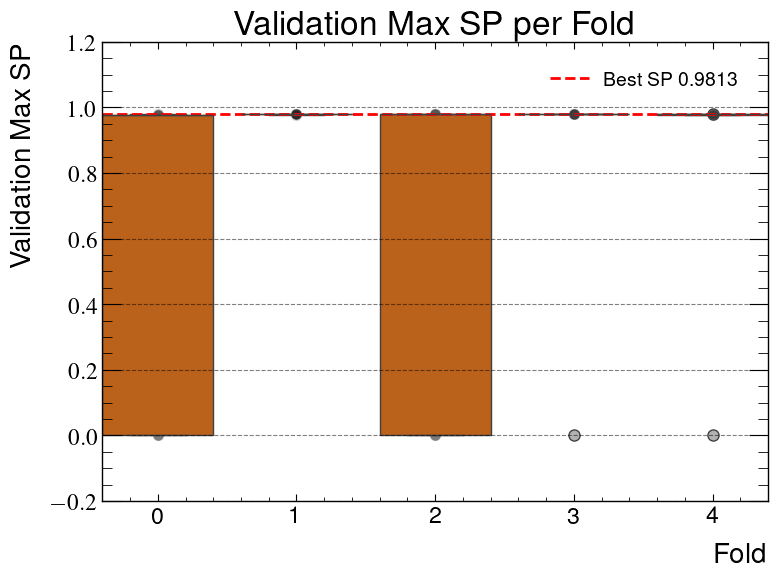

In [5]:
fig, ax = plt.subplots()
ax.grid(linestyle='--', alpha=0.5, color='k')
sns.boxplot(
    kfold_job.metrics,
    x='fold',
    y='val.max_sp',
    ax=ax
)
sns.scatterplot(
    kfold_job.metrics,
    x='fold',
    y='val.max_sp',
    color='k',
    alpha=.3
)
ax.set(
    xlabel='Fold',
    ylabel='Validation Max SP',
    title='Validation Max SP per Fold'
)
ax.axhline(max_sp,
           linestyle='--', color='r',
           label=f'Best SP {max_sp:.4f}')
ax.legend()

# zoom_xlim = ax.get_xlim()
# zoom_ylim=(.965, .99)
# rectangle = patches.Rectangle(
#     (zoom_xlim[0], zoom_ylim[0]),  # (x, y)
#     (zoom_xlim[1] - zoom_xlim[0])*1.1,  # width
#     (zoom_ylim[1] - zoom_ylim[0])*1.1,  # height
#     linewidth=1,
#     linestyle='-',
#     edgecolor='k',
#     facecolor=(128/256, 128/256, 128/256, .5), #RGBA gray with alpha 0.5
# )
# ax.add_patch(rectangle)

# zoom_ax = fig.add_axes([0.23, 0.2, 0.6, 0.55])
# zoom_ax.grid(linestyle='--', alpha=0.5, color='k')
# sns.boxplot(
#     kfold_job.metrics,
#     x='fold',
#     y='val.max_sp',
#     ax=zoom_ax
# )
# zoom_ax.set(
#     xlabel='',
#     ylabel='',
#     title='',
#     ylim=zoom_ylim,
#     xlim=zoom_xlim
# )
# zoom_ax.set_xticklabels(
#     zoom_ax.get_xticklabels(),
#     fontsize='x-small'
# )
# zoom_ax.set_yticklabels(
#     zoom_ax.get_yticklabels(),
#     fontsize='x-small'
# )
# zoom_ax.axhline(max_sp,
#                 label=f'Best SP {max_sp:.4f}',
#                 linestyle='--', color='r')
# zoom_ax.legend()
fig.tight_layout()
fig.savefig(str(output_dir / 'kfold_val_max_sp_fold_variance.png'), dpi=300)

In [6]:
kfold_job.metrics[kfold_job.metrics['val.max_sp'] < 0.1]

,train.max_sp_acc,train.max_sp_fn,train.max_sp_thresh,train.max_sp_fp,train.max_sp_fpr,train.roc_auc,train.max_sp_tn,train.max_sp_tp,train.loss,train.max_sp_tpr,...,predict.max_sp_fpr,predict.max_sp_thresh,predict.roc_auc,predict.max_sp_tn,predict.max_sp_fn,predict.max_sp,predict.max_sp_tpr,id,fold,init
6,0.581978,104911.0,1.0,0.0,0.0,0.5,146059.0,0.0,0.693184,0.0,...,0.0,1.0,0.500000,182574.0,131138.0,0.0,0.0,618d50b6d8d84cf581d9d1dcc60528f1,3,3
12,0.581982,104910.0,1.0,0.0,0.0,0.5,146060.0,0.0,0.693184,0.0,...,0.0,1.0,0.499997,182574.0,131138.0,0.0,0.0,a5630d6ca5cd4b7d91dececa98654c2b,2,2
14,0.581980,104910.0,1.0,0.0,0.0,0.5,146059.0,0.0,0.693184,0.0,...,0.0,1.0,0.500000,182574.0,131138.0,0.0,0.0,e7bccb987beb4d5e9a89a5c4dec283e6,0,2
15,0.581978,104911.0,1.0,0.0,0.0,0.5,146059.0,0.0,0.693184,0.0,...,0.0,1.0,0.500000,182574.0,131138.0,0.0,0.0,28aae3d5fa994bce8cb94bdc51f7b242,4,1
17,0.581982,104910.0,1.0,0.0,0.0,0.5,146060.0,0.0,0.693184,0.0,...,0.0,1.0,0.500000,182574.0,131138.0,0.0,0.0,365664aa1e744568b6001f82445c34b2,2,1
19,0.581980,104910.0,1.0,0.0,0.0,0.5,146059.0,0.0,0.693184,0.0,...,0.0,1.0,0.500000,182574.0,131138.0,0.0,0.0,d4511f01839a437490f47b484e742582,0,1


In [7]:
kfold_job.best_job.metrics_dfs['val']

,acc,sp,fpr,tpr,tp,tn,fp,fn,thresholds
0,0.582512,0.136190,0.000082,0.001373,36.0,36512.0,3.0,26191.0000,1.000000
1,0.867409,0.834539,0.002273,0.685972,17991.0,36432.0,83.0,8236.0010,0.989899
2,0.902553,0.880386,0.002958,0.770999,20221.0,36407.0,108.0,6005.9995,0.979798
3,0.921201,0.904216,0.003615,0.816525,21415.0,36383.0,132.0,4811.9995,0.969697
4,0.932852,0.918993,0.004327,0.845388,22172.0,36357.0,158.0,4054.9998,0.959596
...,...,...,...,...,...,...,...,...,...
95,0.418013,0.000000,1.000000,1.000000,26227.0,0.0,36515.0,0.0000,0.040404
96,0.418013,0.000000,1.000000,1.000000,26227.0,0.0,36515.0,0.0000,0.030303
97,0.418013,0.000000,1.000000,1.000000,26227.0,0.0,36515.0,0.0000,0.020202
98,0.418013,0.000000,1.000000,1.000000,26227.0,0.0,36515.0,0.0000,0.010101


/tmp/ipykernel_30149/1281422610.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zoom_ax.set_xticklabels(
/tmp/ipykernel_30149/1281422610.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zoom_ax.set_yticklabels(
/tmp/ipykernel_30149/1281422610.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


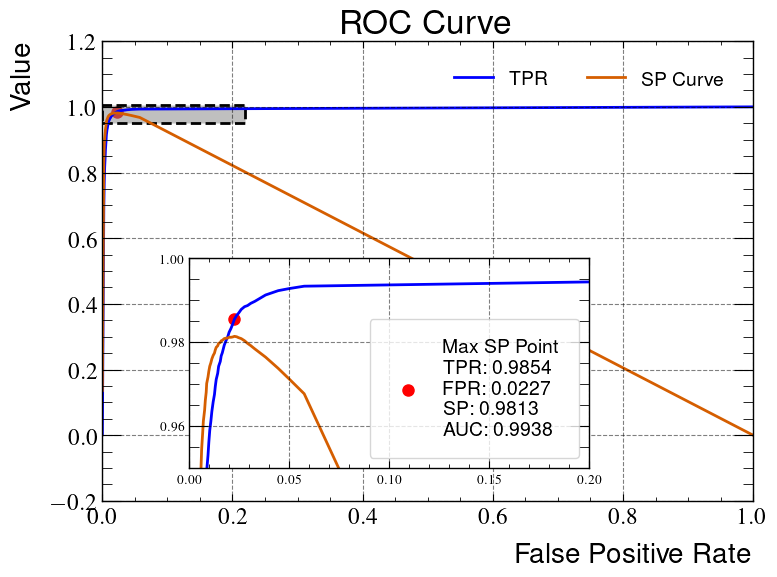

In [8]:
val_eval_df = kfold_job.best_job.metrics_dfs['val'].copy()
fig, ax = plt.subplots()
kfold_job.best_job.metrics_dfs['val'].sort_values('fpr', inplace=True)
auc = np.trapezoid(
    val_eval_df['tpr'],
    val_eval_df['fpr']
)
max_sp_idx = val_eval_df['sp'].idxmax()
max_tpr = val_eval_df.loc[max_sp_idx, 'tpr']
max_fpr = val_eval_df.loc[max_sp_idx, 'fpr']
ax.grid(linestyle='--', alpha=0.5, color='k')
ax.plot(val_eval_df['fpr'], val_eval_df['tpr'], color='b', label='TPR')
ax.plot(val_eval_df['fpr'], val_eval_df['sp'], label='SP Curve')
ax.scatter(max_fpr, max_tpr, color='r')
ax.set(
    xlabel='False Positive Rate',
    ylabel='Value',
    title='ROC Curve'
)
zoom_xlim = (0, .2)
zoom_ylim = (.95, 1)
rectangle = patches.Rectangle(
    (zoom_xlim[0], zoom_ylim[0]),  # (x, y)
    (zoom_xlim[1] - zoom_xlim[0])*1.1,  # width
    (zoom_ylim[1] - zoom_ylim[0])*1.1,  # height
    linewidth=2,
    linestyle='--',
    edgecolor='k',
    facecolor=(128/256, 128/256, 128/256, .5), #RGBA gray with alpha 0.5
)
ax.add_patch(rectangle)

zoom_ax = fig.add_axes([0.25, 0.2, 0.5, 0.35])
zoom_ax.grid(linestyle='--', alpha=0.5, color='k')
zoom_ax.plot(val_eval_df['fpr'], val_eval_df['tpr'], color='b')
zoom_ax.plot(val_eval_df['fpr'], val_eval_df['sp'])
zoom_ax.scatter(max_fpr, max_tpr, color='r', label=f'Max SP Point\nTPR: {max_tpr:.4f}\nFPR: {max_fpr:.4f}\n SP: {max_sp:.4f}\n AUC: {auc:.4f}')
zoom_ax.set(
    xlabel='',
    ylabel='',
    title='',
    xlim=zoom_xlim,
    ylim=zoom_ylim
)
zoom_ax.set_xticklabels(
    zoom_ax.get_xticklabels(),
    fontsize='x-small'
)
zoom_ax.set_yticklabels(
    zoom_ax.get_yticklabels(),
    fontsize='x-small'
)
# max_sp = metrics_df['val_max_sp'].max()
# ax.axhline(max_sp,
#            linestyle='--', color='r')
# zoom_ax.axhline(max_sp,
#                 label=f'Best SP {max_sp:.4f}',
#                 linestyle='--', color='r')
ax.legend(frameon=False, loc='upper right', ncols=2)
zoom_ax.legend(frameon=True)
fig.tight_layout()
fig.savefig(str(output_dir / 'kfold_best_roc_curve.png'), dpi=300)

In [9]:
kfold_metrics = kfold_job.metrics.sort_values(kfold_job.best_metric,
                                              ascending=kfold_job.best_metric_mode == 'min')
best_job = kfold_job.best_job
worst_job = load_job(kfold_metrics.iloc[-1]['id'])

logging.info(f'Best job id is {best_job.id_}')
logging.info(f'Worst job id is {worst_job.id_}')

2025-09-16 01:08:20 | INFO | root | 1605559221 | 6 | Best job id is 2be922495cb6492fafdaa840ac6bb3f8
2025-09-16 01:08:20 | INFO | root | 1605559221 | 7 | Worst job id is 365664aa1e744568b6001f82445c34b2


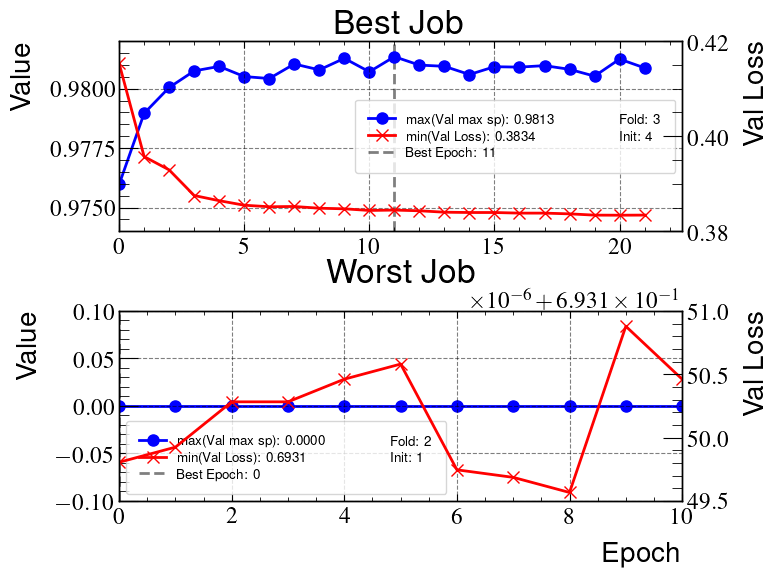

In [11]:
client = mlflow.MlflowClient()
fig, axes = plt.subplots(2, 1)
history_metric = kfold_job.best_metric.replace('.', '_')
history_metric_label = history_metric.replace('_', ' ').capitalize()
histories = [
    {
        'history': pd.DataFrame.from_dict({
            history_metric: [m.value for m in client.get_metric_history(best_job.id_, history_metric)],
            'val_loss': [m.value for m in client.get_metric_history(best_job.id_, 'val_loss')],
        }),
        'title': 'Best Job',
        'loc': 'center right',
        'fold': best_job.tags['fold'],
        'init': best_job.tags['init']
    },
    {
        'history': pd.DataFrame.from_dict({
            history_metric: [m.value for m in client.get_metric_history(worst_job.id_, history_metric)],
            'val_loss': [m.value for m in client.get_metric_history(worst_job.id_, 'val_loss')],
        }),
        'title': 'Worst Job',
        'loc': 'lower left',
        'fold': worst_job.tags['fold'],
        'init': worst_job.tags['init']
    }
]

for i, ax, history in zip(range(len(axes)), axes, histories):
    ax.grid(linestyle='--', alpha=0.5, color='k')
    best_epoch = history['history'][history_metric].idxmax()
    vline = ax.axvline(best_epoch,
                       linestyle='--', color='black', alpha=0.5,
                       label=f'Best Epoch: {best_epoch}')
    metric_line, = ax.plot(history['history'][history_metric],
                     label=f'max({history_metric_label}): {history["history"][history_metric].max():.4f}',
                     marker='o', color='blue')
    ax.set(
        ylabel='Value', title=history["title"]
    )
    twinx = ax.twinx()
    loss_line, = twinx.plot(history['history']['val_loss'],
                        label=f'min(Val Loss): {history["history"]["val_loss"].min():.4f}',
                        marker='x', color='red')
    twinx.set(ylabel='Val Loss')
    fold_line, = ax.plot([], [], ' ',
                        label=f'Fold: {history["fold"]}')
    init_line, = ax.plot([], [], ' ',
                        label=f'Init: {history["init"]}')
    lines = [metric_line, loss_line, vline, fold_line, init_line]
    ax.legend(lines, [l.get_label() for l in lines],
              loc=history.get('loc', None),
              frameon=True,
              facecolor='white',
              fontsize='x-small',
              ncol=2,)
axes[1].set(
    xlabel='Epoch',
)
fig.tight_layout()
fig.savefig(str(output_dir / 'kfold_best_worst_history.png'), dpi=300)

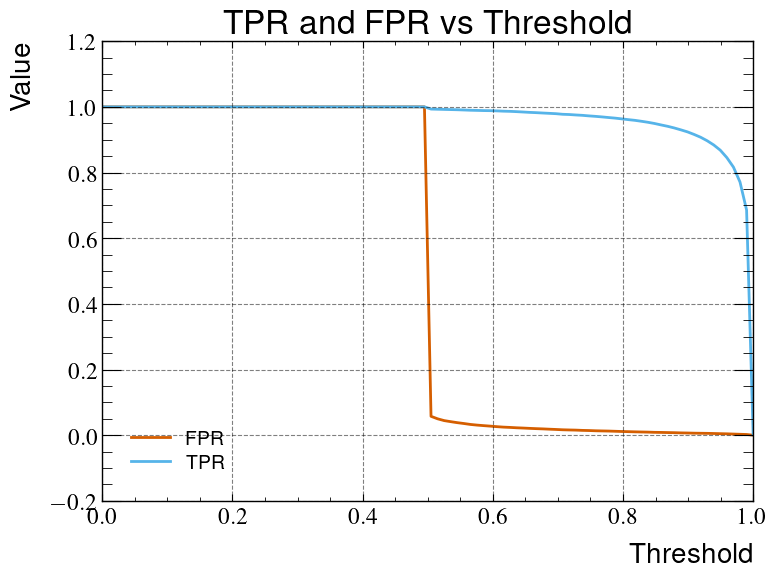

In [17]:
fig, ax = plt.subplots()
ax.grid(linestyle='--', alpha=0.5, color='k')
ax.plot(kfold_job.best_job.metrics_dfs['val']['thresholds'], kfold_job.best_job.metrics_dfs['val']['fpr'], label='FPR')
ax.plot(kfold_job.best_job.metrics_dfs['val']['thresholds'], kfold_job.best_job.metrics_dfs['val']['tpr'], label='TPR')
ax.set(
    xlabel='Threshold',
    ylabel='Value',
    title='TPR and FPR vs Threshold'
)
ax.legend()
fig.tight_layout()
fig.savefig(str(output_dir / 'kfold_best_tpr_fpr_threshold.png'), dpi=300)